# Finding the Best Markets to Advertise in

An **e-learning company** offers courses on programming. Most of the courses are on web and mobile development, but some also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. **Our goal in this project is to find out the two best markets to advertise our product in.**

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import std, mean

### Reading Data

It is very expensive to get market data using surveys. We are, hence, using an already conducted survey carried out by [Free Code Camp](https://www.freecodecamp.org/) in 2017. The data is publically [available here](https://github.com/freeCodeCamp/2017-new-coder-survey). We will use it to find out if there is a market for the courses we offer. And that where exactly is that market located. 

In [2]:
survey=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

D:\Downloads\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', None)
print(survey.shape)
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Data Cleaning/Trimming

In [4]:
value_cols={}
for col in survey.columns:
    if survey[col].notna().sum() > 5000:
        value_cols[col]=survey[col].notna().sum()
        
value_cols

{'Age': 15367,
 'AttendedBootcamp': 17709,
 'CityPopulation': 15354,
 'CommuteTime': 9246,
 'CountryCitizen': 15382,
 'CountryLive': 15336,
 'EmploymentField': 8116,
 'EmploymentStatus': 14345,
 'ExpectedEarning': 7200,
 'Gender': 15454,
 'HasDebt': 15291,
 'HasFinancialDependents': 15329,
 'HasHighSpdInternet': 15380,
 'HasHomeMortgage': 6397,
 'HasServedInMilitary': 15256,
 'HasStudentDebt': 6402,
 'HoursLearning': 16714,
 'ID.x': 18175,
 'ID.y': 15743,
 'Income': 7623,
 'IsEthnicMinority': 15293,
 'IsReceiveDisabilitiesBenefits': 15222,
 'IsSoftwareDev': 18068,
 'IsUnderEmployed': 9223,
 'JobApplyWhen': 8138,
 'JobPref': 13483,
 'JobRelocateYesNo': 6503,
 'JobRoleInterest': 6992,
 'JobWherePref': 8118,
 'LanguageAtHome': 15344,
 'MaritalStatus': 15335,
 'MoneyForLearning': 16577,
 'MonthsProgramming': 17084,
 'NetworkID': 18175,
 'Part1EndTime': 18175,
 'Part1StartTime': 18175,
 'Part2EndTime': 15743,
 'Part2StartTime': 15743,
 'ResourceCodecademy': 9390,
 'ResourceFCC': 13803,
 'Re

We can see that roughly 50 columns have more than 5,000 non null values. We will further filter to keep only those columns that are useful for our analysis. 

In [5]:
imp_cols=['Age','CountryLive','Gender','MoneyForLearning','MonthsProgramming',
          'JobPref','JobRoleInterest','ID.x']
data=survey[imp_cols]
print(data.shape)
data.head()

(18175, 8)


,Age,CountryLive,Gender,MoneyForLearning,MonthsProgramming,JobPref,JobRoleInterest,ID.x
0,27.0,Canada,female,150.0,6.0,start your own business,NaN,02d9465b21e8bd09374b0066fb2d5614
1,34.0,United States of America,male,80.0,6.0,work for a nonprofit,Full-Stack Web Developer,5bfef9ecb211ec4f518cfc1d2a6f3e0c
2,21.0,United States of America,male,1000.0,5.0,work for a medium-sized company,"Front-End Web Developer, Back-End Web Develo...",14f1863afa9c7de488050b82eb3edd96
3,26.0,Brazil,male,0.0,5.0,work for a medium-sized company,"Front-End Web Developer, Full-Stack Web Deve...",91756eb4dc280062a541c25a3d44cfb0
4,20.0,Portugal,female,0.0,24.0,work for a multinational corporation,"Full-Stack Web Developer, Information Security...",aa3f061a1949a90b27bef7411ecd193f


## Observations

### Survey Participants' Field/s of Interest

In [6]:
interests=data['JobRoleInterest'].value_counts(normalize=True)*100

<AxesSubplot:title={'center':'%age Interest in Each Field'}>

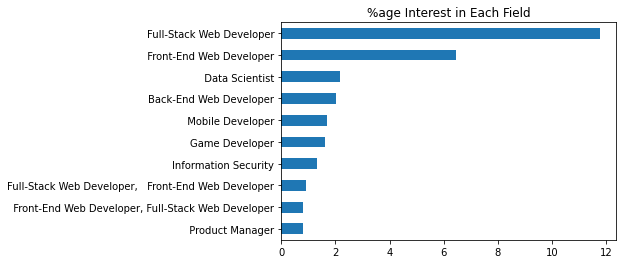

In [7]:
%matplotlib inline
interests.head(10).sort_values().plot.barh(title='%age Interest in Each Field')

**We can clearly see that more people are interested in web development - a course we are offering too. Moreover, we can also see that people can be interested in more than one fields. Next we will calculate the number of people who are interested in anyone of mobile or web development areas (our major offerings)**

In [8]:
import re
field_interest=data['JobRoleInterest'].dropna()
pattern=r'[WG]'
fields=[]
for field in field_interest:
    if re.findall(pattern, field):
        fields.append(field)    
print("There are total {} survey participants who are interested in Web Development, or Mobile Development, or both.".format(len(fields)))    

There are total 6042 survey participants who are interested in Web Development, or Mobile Development, or both.


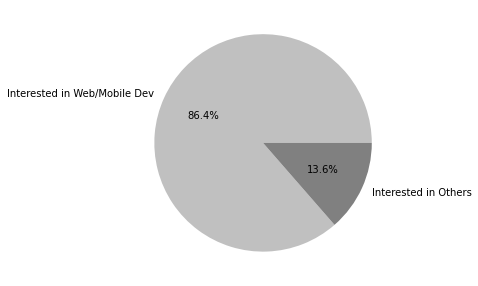

In [9]:
pd.Series((len(fields),(len(field_interest)-len(fields))),
          index=['Interested in Web/Mobile Dev',
                 'Interested in Others']).plot.pie(colors=(['silver','grey']),
                                                  autopct='%1.1f%%',
                                                   figsize=(5,5))
plt.ylabel('')
plt.show()

It is important to note that 86% is not of total number of survey respondents (that was around 18k). In fact, it is the percentage of roughly 7k respondents  who actually gave information about their field of interest.

### Where do Majority of Respondents Live?

- We will take only 7k respondents who actually gave info about their field of interest and try to find out where most of them live
- This will give us an initial idea of potential markets.

<AxesSubplot:title={'center':'Total Number of Potential Clients Living in a Country'}>

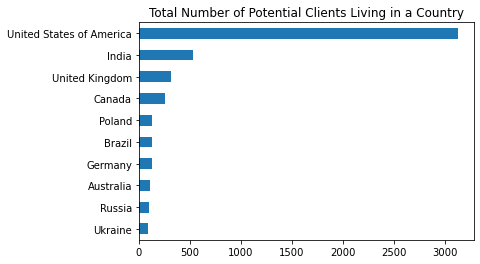

In [10]:
data[data['JobRoleInterest'].notnull()]['CountryLive'].value_counts().head(10).sort_values().plot.barh(title='Total Number of Potential Clients Living in a Country')

<AxesSubplot:title={'center':'%Age of Potential Clients Living in a Country'}>

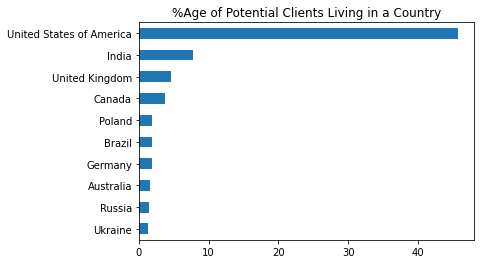

In [11]:
(data[data['JobRoleInterest'].notnull()]['CountryLive'].value_counts(normalize=True)*100).head(10).sort_values().plot.barh(title='%Age of Potential Clients Living in a Country')

**It is clear from above two graphs that out of approx. 7k new coders in the FCC survey:**
- **More than 45% or over 3,000 new coders live in the US**
- **More than 8% or over 600 new coders live in India**
- ** UK and Canada have over 5% of new coders**

### Amount Spent/Month on Leaarning by Potential Clients

- We will try to figure out the amount of money spent by each user per month on learning
- Our subscriptions are paid and we want to target those who are willing to pay
- We will keep our analysis restricted to 4 countries above that have highest number of new coders
- It is now time to see how much these new coders spend per month on learning activities

In [12]:
# countries of those respondents only who mentioned some field of interest

MonthsProgramming= data[data['JobRoleInterest'].notnull()]['MonthsProgramming']
# Converting MonthsProgramming with 0 value to 1 to avoid divided by 0 problem
MonthsProgramming=MonthsProgramming.apply(lambda x : (x+1) if x==0 else x)

MoneyForLearning= data[data['JobRoleInterest'].notnull()]['MoneyForLearning']

Country=data[data['JobRoleInterest'].notnull()]['CountryLive']
#Joining three columns into a df
df=pd.concat([MonthsProgramming,MoneyForLearning,Country],axis=1)

#Creating a new col MoneyPerMonth
df['MoneyPerMonth']=((df['MoneyForLearning'])/(df['MonthsProgramming']))



In [13]:
df.head(10)

,MonthsProgramming,MoneyForLearning,CountryLive,MoneyPerMonth
1,6.0,80.0,United States of America,13.333333
2,5.0,1000.0,United States of America,200.000000
3,5.0,0.0,Brazil,0.000000
4,24.0,0.0,Portugal,0.000000
6,12.0,0.0,United Kingdom,0.000000
9,18.0,100.0,Mexico,5.555556
11,1.0,0.0,Germany,0.000000
13,NaN,NaN,United States of America,NaN
14,9.0,NaN,United States of America,NaN
15,1.0,0.0,United States of America,0.000000


In [14]:
# Removing Nan Values from MoneyPerMonth
df=df[(df['MoneyPerMonth'].notnull())]
df.head(10)

,MonthsProgramming,MoneyForLearning,CountryLive,MoneyPerMonth
1,6.0,80.0,United States of America,13.333333
2,5.0,1000.0,United States of America,200.000000
3,5.0,0.0,Brazil,0.000000
4,24.0,0.0,Portugal,0.000000
6,12.0,0.0,United Kingdom,0.000000
9,18.0,100.0,Mexico,5.555556
11,1.0,0.0,Germany,0.000000
15,1.0,0.0,United States of America,0.000000
16,12.0,200.0,United States of America,16.666667
18,14.0,500.0,United States of America,35.714286


In [15]:
# Removing entries with no country as they are not informative for us!
df=df[df['CountryLive'].notnull()]

In [16]:
df.head(10)

,MonthsProgramming,MoneyForLearning,CountryLive,MoneyPerMonth
1,6.0,80.0,United States of America,13.333333
2,5.0,1000.0,United States of America,200.000000
3,5.0,0.0,Brazil,0.000000
4,24.0,0.0,Portugal,0.000000
6,12.0,0.0,United Kingdom,0.000000
9,18.0,100.0,Mexico,5.555556
11,1.0,0.0,Germany,0.000000
15,1.0,0.0,United States of America,0.000000
16,12.0,200.0,United States of America,16.666667
18,14.0,500.0,United States of America,35.714286


In [17]:
pd.set_option('display.max_rows',None)
mean_money_country=df.groupby(['CountryLive'])['MoneyPerMonth'].mean().sort_values(ascending=False)
target_means=mean_money_country[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

<AxesSubplot:title={'center':'Average USD spent/Month by New Coders'}, ylabel='CountryLive'>

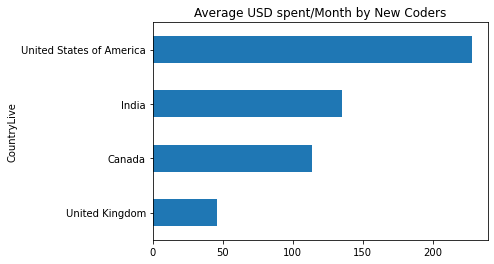

In [18]:
target_means.sort_values(ascending=True).plot.barh(title='Average USD spent/Month by New Coders')

It seems that people are spending more per month on e-learning in India than they do in Canada and UK. This is counter-intuitive given the relative income of these countries. Such a result can be due to:
- Much more participants from India than Canada and UK can increase mean spendings for India (Above analysis shows that participants from India are not greatly out of proportion)
- This leave us with outliers: in this case a few people willing to spend too much on e-learning.
- Let's examine MoneyPerMonth Column for each of these 3 countries to see if there are actually more outliers in Indian case that are right skewing/ increasing the mean of MoneyPerMonth distribution.

### Examining Outliers to Rationalize Mean Spending on e-learning in India as Comapred to Canada and UK

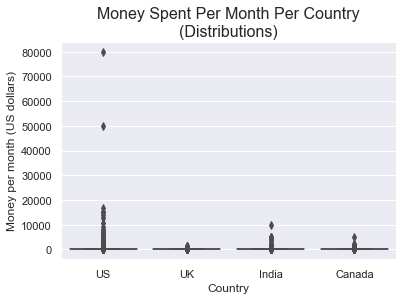

In [19]:
# Isolate only the countries of interest
only_4 = df[df['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

#Box plots to visualize distributions
import seaborn as sns
sns.set_theme()
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4),['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

**Substantial outliers for US and India found!**

At this stage, eliminating anyone with more than 2k expense per month on e-learning would make sense!

In [20]:
only_4=only_4[only_4['MoneyPerMonth']<2000]

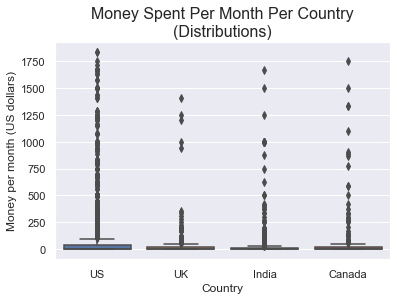

In [21]:
sns.set_theme()
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4),['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [22]:
corrected_mean=only_4.groupby(['CountryLive'])['MoneyPerMonth'].mean().sort_values(ascending=False)

Text(0, 0.5, '')

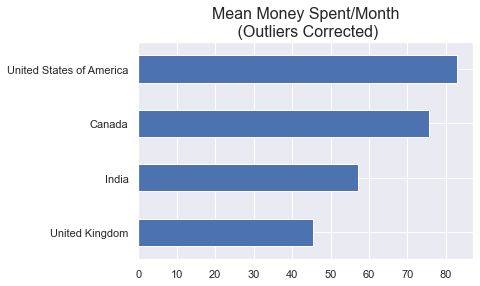

In [23]:
import matplotlib.pyplot 
corrected_mean.sort_values().plot.barh()
plt.title("Mean Money Spent/Month\n (Outliers Corrected)",fontsize=16) 
plt.ylabel("")

In [24]:
length=only_4.groupby(['CountryLive'])['MoneyPerMonth'].count()
corrected_mean
final=pd.concat([length,corrected_mean],axis=1, ignore_index=True)
final

,0,1
CountryLive,,
Canada,237,75.550481
India,455,57.256604
United Kingdom,279,45.534443
United States of America,2862,82.847724


In [25]:
final.rename(columns={0:'TotalParticipants',1:'AvgMoneyPerMonth'}, inplace=True)
final

,TotalParticipants,AvgMoneyPerMonth
CountryLive,,
Canada,237,75.550481
India,455,57.256604
United Kingdom,279,45.534443
United States of America,2862,82.847724


In [26]:
final=final.reset_index()
final

,CountryLive,TotalParticipants,AvgMoneyPerMonth
0,Canada,237,75.550481
1,India,455,57.256604
2,United Kingdom,279,45.534443
3,United States of America,2862,82.847724


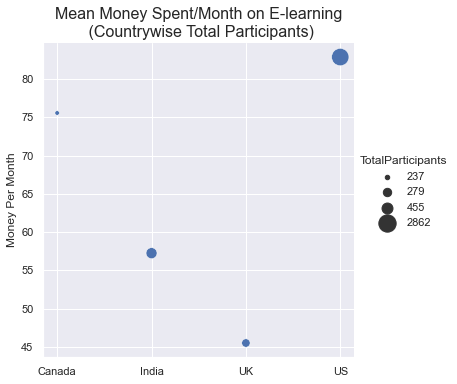

In [27]:
sns.set_theme()
sns.relplot(data=final,
            x='CountryLive',
            y='AvgMoneyPerMonth',
            size='TotalParticipants', sizes=[20,70,120,300])

plt.xticks(range(4),['Canada', 'India', 'UK', 'US']) # avoids tick labels overlap
plt.ylabel('Money Per Month')
plt.xlabel("")
plt.title("Mean Money Spent/Month on E-learning\n (Countrywise Total Participants)", fontsize=16)
plt.show()

The above chart clearly indicates that:
- US has maximum number of people who participated in FreeCodeCamp's Survey and shown an interest in e-learning in web or mobile development (courses that we are offering)
- New coders from the US clearly spend more (82 dollars on average) on e-learning per month than any other country
- In light of these two observations, **US is clearly our target market #1** as it has sufficient market and people there are already paying more than what our average subscription fees per month are (59 dollars)


As far second market is concerned, there seems a clear tradeoff to be made:
- While Canadians have spent more (75 dollars) per month on e-learning, Canadian market size as suggested by total participants is the smallest among four countries
- India on the other hand has the second larget market for e-learning and on an anverage Indina New Coders have spent 57 dollars a month on e-learning
- Since 57 dollars are very close to the amount we are offering our courses in and given the relatively bigger Indian market, **India is our second market destination**